Data source:We will use lending data from 2007-2010 from www.lendingclub.com  and be trying to classify and predict whether or not the borrower paid back their loan in full. Data is downloaded from [here](https://www.lendingclub.com/info/download-data.action) and cleansed for Null values

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data import and checking the data

In [68]:
lcdf=pd.read_csv("loan_data.csv")

In [7]:
lcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [8]:
lcdf.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Explotory data analysis

In [12]:
lcdf['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

The label is heavily imbalanced

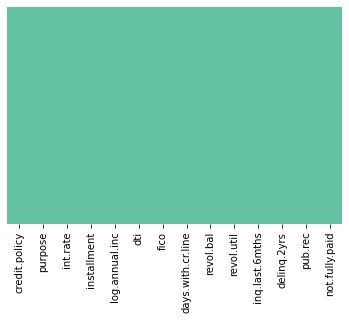

In [19]:
sns.heatmap(lcdf.isnull(),yticklabels=False,cbar=None,cmap='Set2')

NO missing values

plotting Histogram with hues

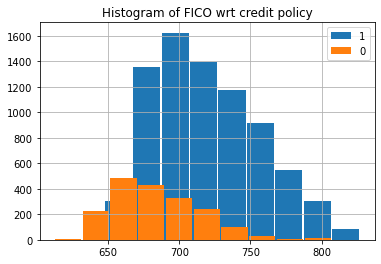

In [40]:
myfig,myaxes=plt.subplots()
plt.hist(lcdf[lcdf['credit.policy']==1]['fico'],stacked=False,rwidth=0.95)
plt.hist(lcdf[lcdf['credit.policy']==0]['fico'],stacked=False,rwidth=0.95)
myaxes.set_title('Histogram of FICO wrt credit policy')
myaxes.legend(['1','0'])
plt.grid()

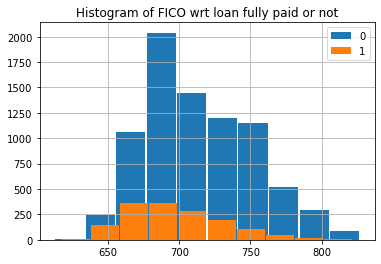

In [42]:
myfig,myaxes=plt.subplots()
plt.hist(lcdf[lcdf['not.fully.paid']==0]['fico'],stacked=False,rwidth=0.95)
plt.hist(lcdf[lcdf['not.fully.paid']==1]['fico'],stacked=False,rwidth=0.95)
myaxes.set_title('Histogram of FICO wrt loan fully paid or not')
myaxes.legend(['0','1'])
plt.grid()

as FICO increases and plocy is abided better chance  of repaying loan

plot of different purpose wrt to paid or not

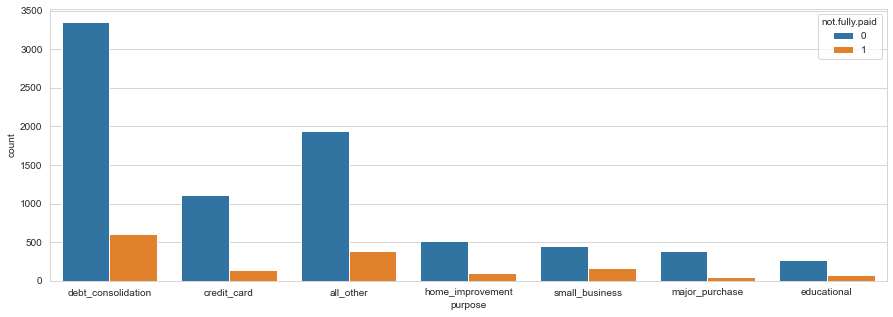

In [46]:
sns.set_style('whitegrid')
myfig,myaxes=plt.subplots(figsize=(15,5))
sns.countplot(x='purpose',data=lcdf,hue='not.fully.paid')

Trend plot of FICO vs Interest Rate

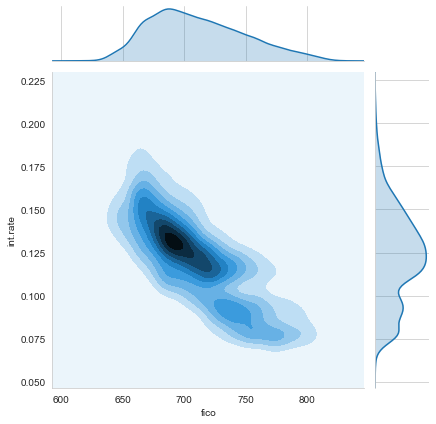

In [48]:
sns.jointplot(x='fico',y='int.rate',data=lcdf,kind='kde')

Linear modelling plot wrt fully paid or not

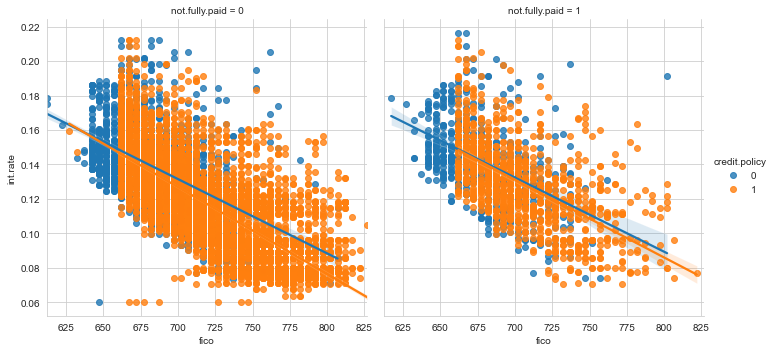

In [50]:
sns.lmplot(data=lcdf,x='fico',y='int.rate',col='not.fully.paid',hue='credit.policy')

Data cleansing

Converting categorical features to numerical dummies

In [53]:
purpose=pd.get_dummies(lcdf['purpose'],drop_first=True)

In [69]:
lcdf_final=lcdf.join(purpose)
lcdf_final.drop(labels='purpose',axis=1,inplace=True)

In [71]:
lcdf_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy         9578 non-null int64
int.rate              9578 non-null float64
installment           9578 non-null float64
log.annual.inc        9578 non-null float64
dti                   9578 non-null float64
fico                  9578 non-null int64
days.with.cr.line     9578 non-null float64
revol.bal             9578 non-null int64
revol.util            9578 non-null float64
inq.last.6mths        9578 non-null int64
delinq.2yrs           9578 non-null int64
pub.rec               9578 non-null int64
not.fully.paid        9578 non-null int64
credit_card           9578 non-null uint8
debt_consolidation    9578 non-null uint8
educational           9578 non-null uint8
home_improvement      9578 non-null uint8
major_purchase        9578 non-null uint8
small_business        9578 non-null uint8
dtypes: float64(6), int64(7), uint8(6)
memory usage: 1.0 MB


All are numerical data

Spliting train and test

In [60]:
from sklearn.model_selection  import train_test_split

In [72]:
ftrain,ftest,ltrain,ltest=train_test_split(lcdf_final[['credit.policy','int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business']],lcdf_final['not.fully.paid'],test_size=0.33,random_state=111)

Decision Tree modelling

In [73]:
from sklearn.tree import DecisionTreeClassifier

myDTC=DecisionTreeClassifier()
myDTC.fit(ftrain,ltrain)
predictions=myDTC.predict(ftest)

Evaluating performance

In [74]:
from sklearn import metrics

In [75]:
print(metrics.classification_report(ltest,predictions))
print('\n')
print(metrics.confusion_matrix(ltest,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2680
           1       0.17      0.19      0.18       481

    accuracy                           0.73      3161
   macro avg       0.51      0.51      0.51      3161
weighted avg       0.75      0.73      0.74      3161



[[2227  453]
 [ 388   93]]


Building ensemble trees-Bagging with 641 trees

In [79]:
from sklearn.ensemble import BaggingClassifier

myBC=BaggingClassifier(n_estimators=641)
myBC.fit(ftrain,ltrain)
predictions=myBC.predict(ftest)

evaluating performance

In [81]:
print(metrics.classification_report(ltest,predictions))
print('\n')
print(metrics.confusion_matrix(ltest,predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2680
           1       0.29      0.03      0.06       481

    accuracy                           0.84      3161
   macro avg       0.57      0.51      0.49      3161
weighted avg       0.77      0.84      0.78      3161



[[2641   39]
 [ 465   16]]


In [84]:
from sklearn.ensemble import RandomForestClassifier

myRFC=RandomForestClassifier(1001)
myRFC.fit(ftrain,ltrain)
predictions=myRFC.predict(ftest)

In [85]:
print(metrics.classification_report(ltest,predictions))
print('\n')
print(metrics.confusion_matrix(ltest,predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2680
           1       0.33      0.02      0.04       481

    accuracy                           0.84      3161
   macro avg       0.59      0.51      0.48      3161
weighted avg       0.77      0.84      0.78      3161



[[2660   20]
 [ 471   10]]


Decision tree performs better tahn bagging,RF for loan **NOT** paid fully